In [5]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [6]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [7]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [8]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [9]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (1,0.2,1000,0)

Vizualize data

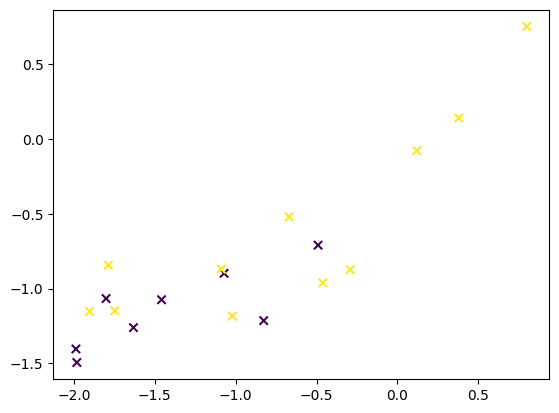

In [10]:
csp = CSP(n_components=12, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(60,90).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [11]:
csp_test_classifiers(12,time_config, 18, 7)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 1s 859ms/step - loss: 0.3855 - accuracy: 0.5333
Epoch 2/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3820 - accuracy: 0.5333
Epoch 3/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3785 - accuracy: 0.5333
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3750 - accuracy: 0.5333
Epoch 5/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3714 - accuracy: 0.5333
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3679 - accuracy: 0.5333
Epoch 7/15
1/1 [==============================] - 0s 11ms/step - loss: 0.3644 - accuracy: 0.5333
Epoch 8/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3609 - accuracy: 0.5333
Epoch 9/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3574 - accuracy: 0.5333
Epoch 10/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3538 - accuracy: 0.5333
Epoch 11/15
1/1 [================

1/1 [==============================] - 0s 161ms/step - loss: 0.2223 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 611ms/step - loss: 0.2004 - accuracy: 0.6667
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1991 - accuracy: 0.6667
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1977 - accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1964 - accuracy: 0.6667
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1951 - accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1938 - accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1925 - accuracy: 0.6667
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1912 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1899 - accuracy: 0.6667
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.2816 - accuracy: 0.4667
Epoch 15/15
1/1 [==============================] - 0s 141ms/step - loss: 0.3608 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 887ms/step - loss: 0.3584 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3551 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3519 - accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3487 - accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3456 - accuracy: 0.3333
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3424 - accuracy: 0.3333
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3393 - accuracy: 0.3333
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3362 - accuracy: 0.3333
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 10ms/step - loss: 0.1215 - accuracy: 0.8667
Epoch 4/15
1/1 [==============================] - 0s 10ms/step - loss: 0.1199 - accuracy: 0.8667
Epoch 5/15
1/1 [==============================] - 0s 11ms/step - loss: 0.1184 - accuracy: 0.9333
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1169 - accuracy: 0.9333
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1155 - accuracy: 1.0000
Epoch 8/15
1/1 [==============================] - 0s 11ms/step - loss: 0.1141 - accuracy: 1.0000
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1127 - accuracy: 1.0000
Epoch 10/15
1/1 [==============================] - 0s 9ms/step - loss: 0.1113 - accuracy: 1.0000
Epoch 11/15
1/1 [==============================] - 0s 10ms/step - loss: 0.1100 - accuracy: 1.0000
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1088 - accuracy: 1.0000
Epoch 13/15
1/1 [==========================

1/1 [==============================] - 0s 7ms/step - loss: 0.5048 - accuracy: 0.0000e+00
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4996 - accuracy: 0.0000e+00
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.4943 - accuracy: 0.0000e+00
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4891 - accuracy: 0.0000e+00
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.4839 - accuracy: 0.0000e+00
Epoch 13/15
1/1 [==============================] - 0s 8ms/step - loss: 0.4787 - accuracy: 0.0000e+00
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4734 - accuracy: 0.0000e+00
Epoch 15/15
1/1 [==============================] - 0s 131ms/step - loss: 0.2665 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 758ms/step - loss: 0.3202 - accuracy: 0.2667
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3158 - accuracy: 0.2000
Epoch 3/15
1/

1/1 [==============================] - 0s 6ms/step - loss: 0.3286 - accuracy: 0.3333
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3241 - accuracy: 0.3333
Epoch 15/15
1/1 [==============================] - 0s 180ms/step - loss: 0.1058 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 0.6467 - accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.6421 - accuracy: 0.0000e+00
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.6376 - accuracy: 0.0000e+00
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.6330 - accuracy: 0.0000e+00
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.6283 - accuracy: 0.0000e+00
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.6237 - accuracy: 0.0000e+00
Epoch 7/15
1/1 [==============================] - 0s 10ms/step - loss: 0.6190 - accuracy: 0.0000e+00
Epoch 8/15
1/1 [===

1/1 [==============================] - 1s 653ms/step - loss: 0.1630 - accuracy: 0.9333
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1603 - accuracy: 0.9333
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1577 - accuracy: 0.9333
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1552 - accuracy: 0.9333
Epoch 5/15
1/1 [==============================] - 0s 9ms/step - loss: 0.1527 - accuracy: 0.9333
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1502 - accuracy: 0.9333
Epoch 7/15
1/1 [==============================] - 0s 9ms/step - loss: 0.1478 - accuracy: 0.9333
Epoch 8/15
1/1 [==============================] - 0s 9ms/step - loss: 0.1454 - accuracy: 0.9333
Epoch 9/15
1/1 [==============================] - 0s 9ms/step - loss: 0.1431 - accuracy: 0.9333
Epoch 10/15
1/1 [==============================] - 0s 9ms/step - loss: 0.1408 - accuracy: 0.9333
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 13ms/step - loss: 0.2242 - accuracy: 0.5333
Epoch 7/15
1/1 [==============================] - 0s 12ms/step - loss: 0.2222 - accuracy: 0.6000
Epoch 8/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2204 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2185 - accuracy: 0.6667
Epoch 10/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2166 - accuracy: 0.6667
Epoch 11/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2148 - accuracy: 0.6667
Epoch 12/15
1/1 [==============================] - 0s 16ms/step - loss: 0.2129 - accuracy: 0.6667
Epoch 13/15
1/1 [==============================] - 0s 27ms/step - loss: 0.2111 - accuracy: 0.6667
Epoch 14/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2093 - accuracy: 0.6667
Epoch 15/15
1/1 [==============================] - 0s 143ms/step - loss: 0.2681 - accuracy: 0.5000
Epoch 1/15
1/1 [======================

1/1 [==============================] - 0s 6ms/step - loss: 0.1636 - accuracy: 0.8667
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1611 - accuracy: 0.8667
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1586 - accuracy: 0.8667
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1562 - accuracy: 0.8667
Epoch 15/15
1/1 [==============================] - 0s 125ms/step - loss: 0.3107 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 654ms/step - loss: 0.2344 - accuracy: 0.6667
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2315 - accuracy: 0.6667
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2286 - accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2259 - accuracy: 0.6667
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2231 - accuracy: 0.6667
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 138ms/step - loss: 0.2394 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 642ms/step - loss: 0.3974 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3935 - accuracy: 0.4667
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3895 - accuracy: 0.4667
Epoch 4/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3854 - accuracy: 0.4667
Epoch 5/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3813 - accuracy: 0.4667
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3771 - accuracy: 0.4667
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3728 - accuracy: 0.4667
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3684 - accuracy: 0.4667
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3640 - accuracy: 0.4667
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 8ms/step - loss: 0.4278 - accuracy: 0.4000
Epoch 6/15
1/1 [==============================] - 0s 10ms/step - loss: 0.4245 - accuracy: 0.4000
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.4211 - accuracy: 0.4000
Epoch 8/15
1/1 [==============================] - 0s 10ms/step - loss: 0.4175 - accuracy: 0.4000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4139 - accuracy: 0.4000
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4102 - accuracy: 0.4000
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4066 - accuracy: 0.4000
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4029 - accuracy: 0.4000
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3993 - accuracy: 0.4000
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3955 - accuracy: 0.4000
Epoch 15/15
1/1 [===========================

1/1 [==============================] - 0s 7ms/step - loss: 0.3174 - accuracy: 0.4667
Epoch 11/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3149 - accuracy: 0.4667
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3124 - accuracy: 0.4667
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3100 - accuracy: 0.4667
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3077 - accuracy: 0.4667
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.1960 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 568ms/step - loss: 0.3933 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3902 - accuracy: 0.2000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3870 - accuracy: 0.2000
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3839 - accuracy: 0.2000
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 127ms/step - loss: 0.2273 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 666ms/step - loss: 0.2114 - accuracy: 0.6000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2090 - accuracy: 0.6000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2067 - accuracy: 0.6000
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2044 - accuracy: 0.6000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2021 - accuracy: 0.6000
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1998 - accuracy: 0.6000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1976 - accuracy: 0.6000
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1954 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1933 - accuracy: 0.6667
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.1488 - accuracy: 0.8000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1458 - accuracy: 0.8000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1428 - accuracy: 0.8000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1399 - accuracy: 0.8000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1370 - accuracy: 0.8000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1342 - accuracy: 0.8000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1313 - accuracy: 0.8000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1285 - accuracy: 0.8000
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1258 - accuracy: 0.8000
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1231 - accuracy: 0.8000
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2134 - accuracy: 0.6667
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2109 - accuracy: 0.6667
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2084 - accuracy: 0.6667
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2059 - accuracy: 0.6667
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2035 - accuracy: 0.6667
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2011 - accuracy: 0.6667
Epoch 15/15
1/1 [==============================] - 0s 167ms/step - loss: 0.3562 - accuracy: 0.0000e+00
Epoch 1/15
1/1 [==============================] - 1s 578ms/step - loss: 0.4986 - accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4933 - accuracy: 0.0000e+00
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4879 - accuracy: 0.0000e+00
Epoch 4/15
1/1 [=========

1/1 [==============================] - 0s 6ms/step - loss: 0.2026 - accuracy: 0.6667
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.5585 - accuracy: 0.0000e+00
Epoch 1/15
1/1 [==============================] - 1s 583ms/step - loss: 0.1938 - accuracy: 0.7333
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1914 - accuracy: 0.7333
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1889 - accuracy: 0.7333
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1865 - accuracy: 0.7333
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1841 - accuracy: 0.7333
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1818 - accuracy: 0.7333
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1794 - accuracy: 0.7333
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1771 - accuracy: 0.7333
Epoch 9/15
1/1 [==========================

1/1 [==============================] - 0s 6ms/step - loss: 0.4496 - accuracy: 0.4000
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4466 - accuracy: 0.4000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4437 - accuracy: 0.4000
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4407 - accuracy: 0.4000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4378 - accuracy: 0.4000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4349 - accuracy: 0.4000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4319 - accuracy: 0.4000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4290 - accuracy: 0.4000
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4261 - accuracy: 0.4000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4232 - accuracy: 0.4000
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 7ms/step - loss: 0.1373 - accuracy: 0.9333
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1349 - accuracy: 0.9333
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1325 - accuracy: 0.9333
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1302 - accuracy: 0.9333
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1279 - accuracy: 0.9333
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1256 - accuracy: 0.9333
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1233 - accuracy: 0.9333
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.2153 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 533ms/step - loss: 0.3341 - accuracy: 0.4000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3311 - accuracy: 0.4000
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.4136 - accuracy: 0.4000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4086 - accuracy: 0.4000
Epoch 15/15
1/1 [==============================] - 0s 156ms/step - loss: 0.2240 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 792ms/step - loss: 0.2817 - accuracy: 0.5333
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2793 - accuracy: 0.5333
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2769 - accuracy: 0.6000
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2746 - accuracy: 0.6000
Epoch 5/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2722 - accuracy: 0.6000
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2698 - accuracy: 0.6000
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2674 - accuracy: 0.6000
Epoch 8/15
1/1 [============================

In [12]:
dwt_test_classifiers(5,'db5',time_config)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 1s 592ms/step - loss: 0.2498 - accuracy: 0.4667
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2493 - accuracy: 0.4667
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2488 - accuracy: 0.4667
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2483 - accuracy: 0.4667
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2479 - accuracy: 0.4667
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2474 - accuracy: 0.4667
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2470 - accuracy: 0.4667
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2465 - accuracy: 0.4667
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2461 - accuracy: 0.4667
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2457 - accuracy: 0.5333
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 7ms/step - loss: 0.2315 - accuracy: 0.4667
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2313 - accuracy: 0.5333
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2310 - accuracy: 0.5333
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2308 - accuracy: 0.5333
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2306 - accuracy: 0.5333
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2304 - accuracy: 0.5333
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2302 - accuracy: 0.5333
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2300 - accuracy: 0.5333
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2298 - accuracy: 0.5333
Epoch 15/15
1/1 [==============================] - 0s 163ms/step - loss: 0.2254 - accuracy: 0.5000
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2847 - accuracy: 0.4000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2841 - accuracy: 0.4000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2835 - accuracy: 0.4000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2829 - accuracy: 0.4000
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2076 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 522ms/step - loss: 0.2113 - accuracy: 0.6667
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2107 - accuracy: 0.6667
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2101 - accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2095 - accuracy: 0.6667
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2088 - accuracy: 0.6667
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 117ms/step - loss: 0.3870 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 566ms/step - loss: 0.3068 - accuracy: 0.4000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3062 - accuracy: 0.5333
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3056 - accuracy: 0.5333
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3051 - accuracy: 0.5333
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3045 - accuracy: 0.5333
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3039 - accuracy: 0.5333
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3033 - accuracy: 0.5333
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3027 - accuracy: 0.5333
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3022 - accuracy: 0.6000
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2671 - accuracy: 0.5333
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2666 - accuracy: 0.5333
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2660 - accuracy: 0.5333
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2654 - accuracy: 0.5333
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2648 - accuracy: 0.5333
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2643 - accuracy: 0.5333
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2637 - accuracy: 0.5333
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2631 - accuracy: 0.5333
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2625 - accuracy: 0.5333
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2620 - accuracy: 0.5333
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3406 - accuracy: 0.3333
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3401 - accuracy: 0.3333
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3395 - accuracy: 0.3333
Epoch 13/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3390 - accuracy: 0.3333
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3385 - accuracy: 0.3333
Epoch 15/15
1/1 [==============================] - 0s 128ms/step - loss: 0.1892 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 692ms/step - loss: 0.3135 - accuracy: 0.4667
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3131 - accuracy: 0.6000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3128 - accuracy: 0.6000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3125 - accuracy: 0.6000
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 115ms/step - loss: 0.1535 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 566ms/step - loss: 0.2447 - accuracy: 0.6000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2440 - accuracy: 0.6000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2433 - accuracy: 0.6000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2425 - accuracy: 0.6000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2418 - accuracy: 0.6000
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2411 - accuracy: 0.6000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2404 - accuracy: 0.6000
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2397 - accuracy: 0.6000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2389 - accuracy: 0.6000
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2735 - accuracy: 0.2667
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2730 - accuracy: 0.2667
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2725 - accuracy: 0.2667
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2720 - accuracy: 0.2667
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2715 - accuracy: 0.2667
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2710 - accuracy: 0.2667
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2705 - accuracy: 0.3333
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2700 - accuracy: 0.3333
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2695 - accuracy: 0.3333
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2691 - accuracy: 0.3333
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2963 - accuracy: 0.5333
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2955 - accuracy: 0.5333
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2947 - accuracy: 0.5333
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2939 - accuracy: 0.5333
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2931 - accuracy: 0.5333
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2923 - accuracy: 0.5333
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.1876 - accuracy: 1.0000
Epoch 1/15
1/1 [==============================] - 1s 553ms/step - loss: 0.3103 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3098 - accuracy: 0.4000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3093 - accuracy: 0.4000
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2427 - accuracy: 0.5333
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.3686 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 583ms/step - loss: 0.3386 - accuracy: 0.4667
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3379 - accuracy: 0.4667
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3372 - accuracy: 0.4667
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3365 - accuracy: 0.4667
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3358 - accuracy: 0.4667
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3351 - accuracy: 0.4667
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3344 - accuracy: 0.4667
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3338 - accuracy: 0.4667
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3151 - accuracy: 0.4667
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3143 - accuracy: 0.4667
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3135 - accuracy: 0.4667
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3126 - accuracy: 0.4667
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3118 - accuracy: 0.4667
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3110 - accuracy: 0.4667
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3101 - accuracy: 0.4667
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3093 - accuracy: 0.4667
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3085 - accuracy: 0.4667
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3076 - accuracy: 0.4667
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2641 - accuracy: 0.6000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2637 - accuracy: 0.6000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2633 - accuracy: 0.6000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2629 - accuracy: 0.6000
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2626 - accuracy: 0.6000
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2622 - accuracy: 0.6000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2618 - accuracy: 0.6000
Epoch 15/15
1/1 [==============================] - 0s 148ms/step - loss: 0.2778 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 553ms/step - loss: 0.3199 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3193 - accuracy: 0.3333
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2852 - accuracy: 0.6667
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2847 - accuracy: 0.6667
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2622 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 568ms/step - loss: 0.2777 - accuracy: 0.4000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2773 - accuracy: 0.4000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2769 - accuracy: 0.4000
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2765 - accuracy: 0.4000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2761 - accuracy: 0.4000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2757 - accuracy: 0.4000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2753 - accuracy: 0.4000
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2896 - accuracy: 0.5333
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2890 - accuracy: 0.5333
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2883 - accuracy: 0.5333
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2876 - accuracy: 0.5333
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2870 - accuracy: 0.5333
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2863 - accuracy: 0.5333
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2857 - accuracy: 0.5333
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2850 - accuracy: 0.5333
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2844 - accuracy: 0.5333
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2837 - accuracy: 0.5333
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.3197 - accuracy: 0.4000
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3190 - accuracy: 0.4000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3182 - accuracy: 0.4000
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3174 - accuracy: 0.4000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3166 - accuracy: 0.4000
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3158 - accuracy: 0.4000
Epoch 13/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3150 - accuracy: 0.4000
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3142 - accuracy: 0.4000
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.4438 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 552ms/step - loss: 0.2473 - accuracy: 0.6000
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3536 - accuracy: 0.3333
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3527 - accuracy: 0.3333
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3518 - accuracy: 0.3333
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.3782 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 599ms/step - loss: 0.2877 - accuracy: 0.6000
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2870 - accuracy: 0.6000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2862 - accuracy: 0.6000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2855 - accuracy: 0.6000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2847 - accuracy: 0.6000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2840 - accuracy: 0.6000
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 603ms/step - loss: 0.3993 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3985 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3978 - accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3971 - accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3963 - accuracy: 0.3333
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3956 - accuracy: 0.3333
Epoch 7/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3948 - accuracy: 0.3333
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3941 - accuracy: 0.3333
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3933 - accuracy: 0.3333
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3926 - accuracy: 0.3333
Epoch 11/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2096 - accuracy: 0.7333
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2091 - accuracy: 0.7333
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2086 - accuracy: 0.7333
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2080 - accuracy: 0.7333
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2075 - accuracy: 0.7333
Epoch 11/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2069 - accuracy: 0.7333
Epoch 12/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2064 - accuracy: 0.7333
Epoch 13/15
1/1 [==============================] - 0s 12ms/step - loss: 0.2059 - accuracy: 0.7333
Epoch 14/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2054 - accuracy: 0.7333
Epoch 15/15
1/1 [==============================] - 0s 190ms/step - loss: 0.3186 - accuracy: 0.2500
Epoch 1/15
1/1 [========================

1/1 [==============================] - 0s 11ms/step - loss: 0.1732 - accuracy: 0.7333
Epoch 12/15
1/1 [==============================] - 0s 9ms/step - loss: 0.1726 - accuracy: 0.7333
Epoch 13/15
1/1 [==============================] - 0s 10ms/step - loss: 0.1719 - accuracy: 0.7333
Epoch 14/15
1/1 [==============================] - 0s 15ms/step - loss: 0.1712 - accuracy: 0.7333
Epoch 15/15
1/1 [==============================] - 0s 203ms/step - loss: 0.3900 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 807ms/step - loss: 0.3021 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3014 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3006 - accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2998 - accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2990 - accuracy: 0.3333
Epoch 6/15
1/1 [========================

left vs right

In [13]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.2,400,100)

In [14]:
csp_test_classifiers(2,time_config, 140, 120)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 1s 732ms/step - loss: 0.2232 - accuracy: 0.5833
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2227 - accuracy: 0.6667
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2221 - accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2216 - accuracy: 0.6667
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2210 - accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2204 - accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2197 - accuracy: 0.6667
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2190 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2183 - accuracy: 0.6667
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2176 - accuracy: 0.6667
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 6ms/step - loss: 0.2625 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 17ms/step - loss: 0.2615 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2605 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2596 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2587 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2578 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2569 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2559 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2551 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.1952 - accuracy: 1.0000
Epoch 1/15
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.3336 - accuracy: 0.4167
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3327 - accuracy: 0.4167
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3318 - accuracy: 0.4167
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3309 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 140ms/step - loss: 0.3296 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 746ms/step - loss: 0.1576 - accuracy: 0.7500
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1571 - accuracy: 0.7500
Epoch 3/15
1/1 [==============================] - 0s 16ms/step - loss: 0.1567 - accuracy: 0.7500
Epoch 4/15
1/1 [==============================] - 0s 10ms/step - loss: 0.1562 - accuracy: 0.7500
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.1557 - accuracy: 0.7500
Epoch 6/15
1/1 [=========================

1/1 [==============================] - 0s 135ms/step - loss: 0.3577 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 588ms/step - loss: 0.2410 - accuracy: 0.7500
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2405 - accuracy: 0.7500
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2401 - accuracy: 0.7500
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2396 - accuracy: 0.7500
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2391 - accuracy: 0.7500
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2386 - accuracy: 0.7500
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2382 - accuracy: 0.7500
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2377 - accuracy: 0.7500
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2372 - accuracy: 0.7500
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3466 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3458 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3450 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3442 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3434 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3426 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3418 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3410 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3402 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3394 - accuracy: 0.5000
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2486 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2471 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2456 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2441 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2426 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.2012 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 594ms/step - loss: 0.3263 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3254 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3245 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3236 - accuracy: 0.4167
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 117ms/step - loss: 0.3585 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 611ms/step - loss: 0.3233 - accuracy: 0.2500
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3225 - accuracy: 0.0833
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3217 - accuracy: 0.0833
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3209 - accuracy: 0.0000e+00
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3201 - accuracy: 0.0833
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3193 - accuracy: 0.0833
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3185 - accuracy: 0.0833
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3178 - accuracy: 0.0833
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3170 - accuracy: 0.0833
Epoch 10/15
1/1 [==========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3018 - accuracy: 0.1667
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3006 - accuracy: 0.1667
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2993 - accuracy: 0.1667
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2980 - accuracy: 0.1667
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2968 - accuracy: 0.1667
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2955 - accuracy: 0.1667
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2943 - accuracy: 0.1667
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2930 - accuracy: 0.1667
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2918 - accuracy: 0.1667
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2906 - accuracy: 0.1667
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2542 - accuracy: 0.3333
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2540 - accuracy: 0.3333
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2537 - accuracy: 0.3333
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2535 - accuracy: 0.3333
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2533 - accuracy: 0.3333
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2531 - accuracy: 0.3333
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2504 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 616ms/step - loss: 0.2967 - accuracy: 0.1667
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2959 - accuracy: 0.1667
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2952 - accuracy: 0.1667
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2874 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.4387 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 600ms/step - loss: 0.4354 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4346 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4338 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4329 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4321 - accuracy: 0.4167
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4313 - accuracy: 0.4167
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4304 - accuracy: 0.4167
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4295 - accuracy: 0.4167
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3129 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3122 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3114 - accuracy: 0.4167
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3107 - accuracy: 0.4167
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3099 - accuracy: 0.4167
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3092 - accuracy: 0.4167
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3084 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3076 - accuracy: 0.4167
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3068 - accuracy: 0.4167
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3060 - accuracy: 0.4167
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.1735 - accuracy: 0.5833
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1727 - accuracy: 0.5833
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1718 - accuracy: 0.5833
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1709 - accuracy: 0.6667
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1700 - accuracy: 0.6667
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1692 - accuracy: 0.6667
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1683 - accuracy: 0.6667
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.2915 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 590ms/step - loss: 0.2859 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2836 - accuracy: 0.4167
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3123 - accuracy: 0.4167
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3113 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.2131 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 597ms/step - loss: 0.3666 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3650 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3633 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3616 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3599 - accuracy: 0.4167
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3583 - accuracy: 0.4167
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3566 - accuracy: 0.4167
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2849 - accuracy: 0.6667
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2841 - accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2833 - accuracy: 0.6667
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2825 - accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2817 - accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2809 - accuracy: 0.6667
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2801 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2793 - accuracy: 0.6667
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2785 - accuracy: 0.6667
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2777 - accuracy: 0.6667
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.2048 - accuracy: 0.7500
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2037 - accuracy: 0.8333
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2027 - accuracy: 0.8333
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2017 - accuracy: 0.8333
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2007 - accuracy: 0.8333
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1998 - accuracy: 0.8333
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1988 - accuracy: 0.8333
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1979 - accuracy: 0.8333
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2995 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 554ms/step - loss: 0.2366 - accuracy: 0.5833
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.2620 - accuracy: 0.4167
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2614 - accuracy: 0.4167
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2608 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2693 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 625ms/step - loss: 0.2803 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2793 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2784 - accuracy: 0.2500
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2775 - accuracy: 0.2500
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2766 - accuracy: 0.2500
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2757 - accuracy: 0.2500
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 534ms/step - loss: 0.1571 - accuracy: 0.7500
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1563 - accuracy: 0.7500
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1555 - accuracy: 0.7500
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1547 - accuracy: 0.7500
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1540 - accuracy: 0.7500
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1532 - accuracy: 0.7500
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1524 - accuracy: 0.7500
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1517 - accuracy: 0.7500
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1510 - accuracy: 0.7500
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1502 - accuracy: 0.7500
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2557 - accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2546 - accuracy: 0.6667
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2535 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2524 - accuracy: 0.7500
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2513 - accuracy: 0.7500
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2503 - accuracy: 0.7500
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2492 - accuracy: 0.7500
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2482 - accuracy: 0.7500
Epoch 14/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2471 - accuracy: 0.7500
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.2411 - accuracy: 0.5000
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2130 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2117 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2104 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2091 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.4125 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 615ms/step - loss: 0.3300 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3287 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3274 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3261 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3248 - accuracy: 0.5000
Epoch 6/15
1/1 [===========================

In [15]:
dwt_test_classifiers(5,'db5',time_config)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 1s 606ms/step - loss: 0.2689 - accuracy: 0.5833
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2684 - accuracy: 0.5833
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2680 - accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2675 - accuracy: 0.6667
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2671 - accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2666 - accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2662 - accuracy: 0.6667
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2657 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2653 - accuracy: 0.6667
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2648 - accuracy: 0.6667
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 6ms/step - loss: 0.2423 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2419 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2414 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2410 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2406 - accuracy: 0.5833
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2401 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2397 - accuracy: 0.5833
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2392 - accuracy: 0.5833
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2388 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.2321 - accuracy: 0.7500
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2096 - accuracy: 0.7500
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2089 - accuracy: 0.7500
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2082 - accuracy: 0.7500
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2075 - accuracy: 0.7500
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.1840 - accuracy: 1.0000
Epoch 1/15
1/1 [==============================] - 1s 529ms/step - loss: 0.3212 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3206 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3200 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3193 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3187 - accuracy: 0.5000
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 171ms/step - loss: 0.1864 - accuracy: 0.7500
Epoch 1/15
1/1 [==============================] - 1s 567ms/step - loss: 0.2116 - accuracy: 0.7500
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2113 - accuracy: 0.7500
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2109 - accuracy: 0.7500
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2105 - accuracy: 0.7500
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2102 - accuracy: 0.7500
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2098 - accuracy: 0.7500
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2094 - accuracy: 0.7500
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2090 - accuracy: 0.7500
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2087 - accuracy: 0.7500
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.3992 - accuracy: 0.3333
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3985 - accuracy: 0.3333
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3978 - accuracy: 0.3333
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3971 - accuracy: 0.3333
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3964 - accuracy: 0.3333
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3956 - accuracy: 0.3333
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3949 - accuracy: 0.3333
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3942 - accuracy: 0.3333
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3935 - accuracy: 0.3333
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3928 - accuracy: 0.3333
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2674 - accuracy: 0.3333
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2669 - accuracy: 0.3333
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2664 - accuracy: 0.3333
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2660 - accuracy: 0.3333
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2655 - accuracy: 0.3333
Epoch 15/15
1/1 [==============================] - 0s 130ms/step - loss: 0.2925 - accuracy: 0.0000e+00
Epoch 1/15
1/1 [==============================] - 1s 664ms/step - loss: 0.3579 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3569 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3559 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3550 - accuracy: 0.5000
Epoch 5/15
1/1 [=====================

1/1 [==============================] - 0s 119ms/step - loss: 0.2862 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 539ms/step - loss: 0.2885 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2879 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2872 - accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2865 - accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2859 - accuracy: 0.3333
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2852 - accuracy: 0.3333
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2846 - accuracy: 0.3333
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2839 - accuracy: 0.3333
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2833 - accuracy: 0.3333
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2574 - accuracy: 0.6667
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2569 - accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2563 - accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2557 - accuracy: 0.6667
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2551 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2545 - accuracy: 0.6667
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2539 - accuracy: 0.6667
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2534 - accuracy: 0.6667
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2528 - accuracy: 0.6667
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2522 - accuracy: 0.6667
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.3352 - accuracy: 0.2500
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3341 - accuracy: 0.2500
Epoch 11/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3330 - accuracy: 0.2500
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3320 - accuracy: 0.2500
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3309 - accuracy: 0.2500
Epoch 14/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3298 - accuracy: 0.2500
Epoch 15/15
1/1 [==============================] - 0s 145ms/step - loss: 0.2699 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 540ms/step - loss: 0.2891 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2887 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2883 - accuracy: 0.4167
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2092 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.1822 - accuracy: 1.0000
Epoch 1/15
1/1 [==============================] - 1s 750ms/step - loss: 0.2750 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2744 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2737 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2731 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2725 - accuracy: 0.4167
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2719 - accuracy: 0.4167
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2712 - accuracy: 0.4167
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2706 - accuracy: 0.4167
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3345 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3338 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3331 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3323 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3316 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3309 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3301 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3294 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3287 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3279 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 7ms/step - loss: 0.2655 - accuracy: 0.4167
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2646 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2638 - accuracy: 0.4167
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2630 - accuracy: 0.4167
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2621 - accuracy: 0.4167
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2613 - accuracy: 0.4167
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2605 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.2571 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 641ms/step - loss: 0.3528 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3519 - accuracy: 0.4167
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2427 - accuracy: 0.7500
Epoch 14/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2421 - accuracy: 0.7500
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.4608 - accuracy: 0.0000e+00
Epoch 1/15
1/1 [==============================] - 1s 576ms/step - loss: 0.2257 - accuracy: 0.6667
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2252 - accuracy: 0.6667
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2248 - accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2243 - accuracy: 0.6667
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2234 - accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2230 - accuracy: 0.6667
Epoch 8/15
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.2018 - accuracy: 0.8333
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2014 - accuracy: 0.8333
Epoch 4/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2009 - accuracy: 0.8333
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2005 - accuracy: 0.8333
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2001 - accuracy: 0.8333
Epoch 7/15
1/1 [==============================] - 0s 9ms/step - loss: 0.1997 - accuracy: 0.8333
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1992 - accuracy: 0.8333
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1988 - accuracy: 0.8333
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1984 - accuracy: 0.8333
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1980 - accuracy: 0.8333
Epoch 12/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.5293 - accuracy: 0.0833
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.5283 - accuracy: 0.0833
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.5273 - accuracy: 0.0833
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.5263 - accuracy: 0.0833
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.5253 - accuracy: 0.0833
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.5243 - accuracy: 0.0833
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.5232 - accuracy: 0.0833
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.5222 - accuracy: 0.0833
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.4093 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 547ms/step - loss: 0.3903 - accuracy: 0.1667
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.2535 - accuracy: 0.5833
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2529 - accuracy: 0.5833
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2523 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.4612 - accuracy: 0.2500
Epoch 1/15
1/1 [==============================] - 1s 595ms/step - loss: 0.1877 - accuracy: 0.5833
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1870 - accuracy: 0.5833
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1862 - accuracy: 0.5833
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1855 - accuracy: 0.5833
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1847 - accuracy: 0.5833
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1840 - accuracy: 0.5833
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 569ms/step - loss: 0.2003 - accuracy: 0.5833
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1999 - accuracy: 0.7500
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1994 - accuracy: 0.7500
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1989 - accuracy: 0.7500
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1985 - accuracy: 0.7500
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1980 - accuracy: 0.8333
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1976 - accuracy: 0.8333
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1971 - accuracy: 0.9167
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1966 - accuracy: 0.9167
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1962 - accuracy: 0.9167
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.3407 - accuracy: 0.5833
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3403 - accuracy: 0.5833
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3400 - accuracy: 0.5833
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3396 - accuracy: 0.5833
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3393 - accuracy: 0.5833
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3389 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3386 - accuracy: 0.5833
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3382 - accuracy: 0.5833
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3379 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.4012 - accuracy: 0.2500
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2790 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2786 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2783 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2779 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.2827 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 551ms/step - loss: 0.2614 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2610 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2606 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2602 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2598 - accuracy: 0.4167
Epoch 6/15
1/1 [==========================

In [1]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [2]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [3]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [4]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
